In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for Earth
g_earth = 9.81  # m/s^2, gravitational acceleration
rho_earth = 1.225  # kg/m^3, air density at sea level
Cd_pre = 0.5  # Drag coefficient before parachute deployment
Cd_post = 3.5  # Increased drag coefficient after parachute deployment
A = 3.0  # Increased cross-sectional area in m^2
m = 60.0  # Reduced mass in kg

# Constants for Planet A
g_planet_a = 5.5  # m/s^2, gravitational acceleration on Planet A
rho_planet_a = 0.9  # kg/m^3, air density on Planet A

# Safe landing velocity (threshold for crash detection)
safe_landing_velocity = 6.0  # m/s

# Parachute deployment altitude
deployment_altitude = 1200  # m

# Initial conditions
h0 = 3500  # Initial altitude in meters
v0 = 0  # Initial velocity in m/s
t_max = 300  # Maximum simulation time in seconds
dt = 0.1  # Time step in seconds

# Function to simulate descent
def simulate_descent(g, rho, planet_name):
    print(f"\nStarting simulation for {planet_name}...")
    print(f"Initial altitude: {h0} m, Initial velocity: {v0} m/s, Gravitational acceleration: {g} m/s^2")

    t = [0]  # Time list
    h = [h0]  # Altitude list
    v = [v0]  # Velocity list
    parachute_deployed = False

    # Run simulation loop
    while h[-1] > 0:
        # Determine drag coefficient based on altitude
        Cd = Cd_post if h[-1] <= deployment_altitude else Cd_pre

        if not parachute_deployed and h[-1] <= deployment_altitude:
            print(f"Parachute deployed at altitude: {h[-1]:.2f} m")
            parachute_deployed = True

        # Calculate next velocity and altitude
        v_next = v[-1] + (g - 0.5 * Cd * rho * A * v[-1]**2 / m) * dt
        h_next = h[-1] - v_next * dt

        # Debug print every 10 seconds of simulation time
        if len(t) % int(10 / dt) == 0:
            print(f"Time: {t[-1]:.1f} s, Altitude: {h[-1]:.2f} m, Velocity: {v[-1]:.2f} m/s")

        # Append new values
        t.append(t[-1] + dt)
        v.append(v_next)
        h.append(max(h_next, 0))  # Ensure altitude doesn't go below zero

    # Check for crash or safe landing
    if abs(v[-1]) > safe_landing_velocity:
        print(f"Result for {planet_name}: CRASH! Final velocity: {v[-1]:.2f} m/s exceeds safe limit of {safe_landing_velocity} m/s.")
    else:
        print(f"Result for {planet_name}: SAFE LANDING. Final velocity: {v[-1]:.2f} m/s within safe limit.")

    print(f"Simulation for {planet_name} completed.")
    print(f"Time to reach the ground: {t[-1]:.2f} seconds")
    print(f"Maximum velocity during descent: {max(v):.2f} m/s")

    return np.array(t), np.array(h), np.array(v)

# Simulate for Earth and Planet A
t_earth, h_earth, v_earth = simulate_descent(g_earth, rho_earth, "Earth")
t_planet_a, h_planet_a, v_planet_a = simulate_descent(g_planet_a, rho_planet_a, "Planet A")



Starting simulation for Earth...
Initial altitude: 3500 m, Initial velocity: 0 m/s, Gravitational acceleration: 9.81 m/s^2
Time: 9.9 s, Altitude: 3292.63 m, Velocity: 25.29 m/s
Time: 19.9 s, Altitude: 3039.54 m, Velocity: 25.31 m/s
Time: 29.9 s, Altitude: 2786.43 m, Velocity: 25.31 m/s
Time: 39.9 s, Altitude: 2533.32 m, Velocity: 25.31 m/s
Time: 49.9 s, Altitude: 2280.21 m, Velocity: 25.31 m/s
Time: 59.9 s, Altitude: 2027.10 m, Velocity: 25.31 m/s
Time: 69.9 s, Altitude: 1773.99 m, Velocity: 25.31 m/s
Time: 79.9 s, Altitude: 1520.88 m, Velocity: 25.31 m/s
Time: 89.9 s, Altitude: 1267.76 m, Velocity: 25.31 m/s
Parachute deployed at altitude: 1199.42 m
Time: 99.9 s, Altitude: 1125.82 m, Velocity: 9.57 m/s
Time: 109.9 s, Altitude: 1030.16 m, Velocity: 9.57 m/s
Time: 119.9 s, Altitude: 934.49 m, Velocity: 9.57 m/s
Time: 129.9 s, Altitude: 838.82 m, Velocity: 9.57 m/s
Time: 139.9 s, Altitude: 743.16 m, Velocity: 9.57 m/s
Time: 149.9 s, Altitude: 647.49 m, Velocity: 9.57 m/s
Time: 159.9 s, 

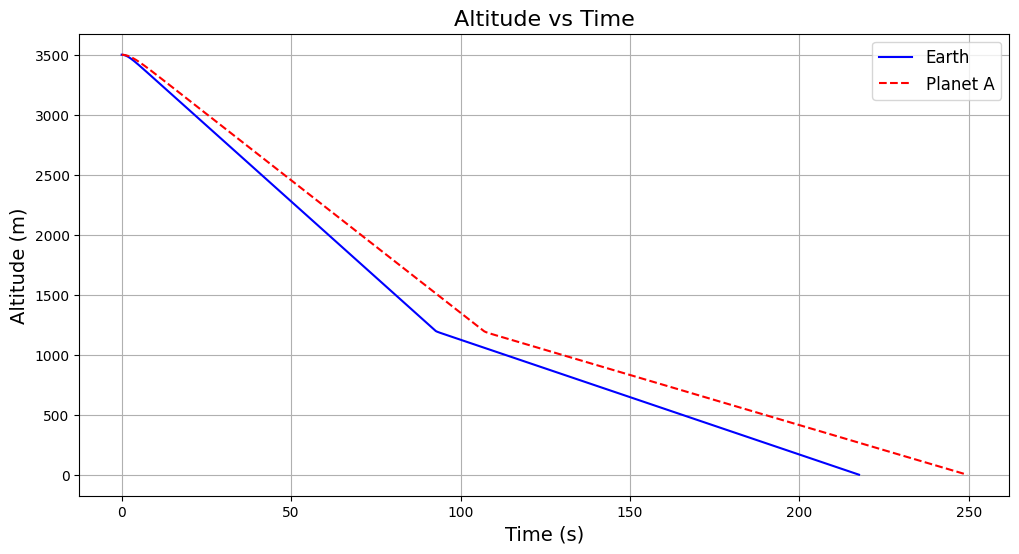

In [6]:
# Plot Altitude vs Time
plt.figure(figsize=(12, 6))
plt.plot(t_earth, h_earth, label="Earth", color="blue")
plt.plot(t_planet_a, h_planet_a, label="Planet A", color="red", linestyle="--")
plt.title("Altitude vs Time", fontsize=16)
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Altitude (m)", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


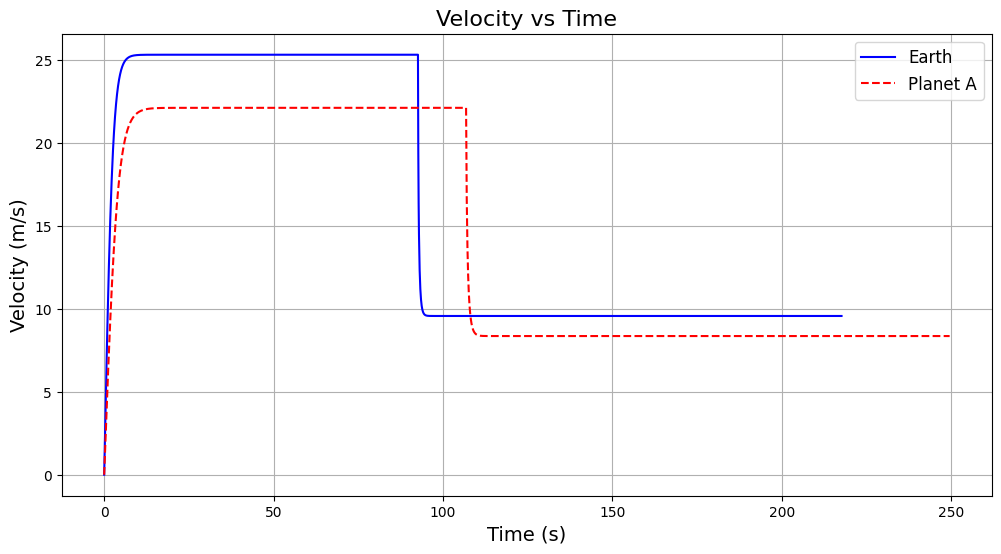

In [7]:
# Plot Velocity vs Time
plt.figure(figsize=(12, 6))
plt.plot(t_earth, v_earth, label="Earth", color="blue")
plt.plot(t_planet_a, v_planet_a, label="Planet A", color="red", linestyle="--")
plt.title("Velocity vs Time", fontsize=16)
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Velocity (m/s)", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()
